In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df_good_topics = pd.read_csv("C:/Users/giulia macis/Desktop/UBISOFT/df_good_topics.csv")
df_good_topics

,title,num_topics
0,GTA 5 - Review,3
1,Space Marine 2 - Before You Buy,5
2,Alan Wake 2 - Before You Buy,4
3,PlayerUnknown's Battlegrounds (PS4) - Before Y...,4
4,Apex Legends - Before You Buy,2
5,Uncharted 4: A Thief's End Review,4
6,Super Mario Bros. Wonder Review,4
7,Final Fantasy 7 Rebirth Review,3
8,Red Dead Redemption 2 Review,6
9,The Legend of Zelda: Tears of the Kingdom Review,6


In [13]:
df_bad_topics = pd.read_csv("C:/Users/giulia macis/Desktop/UBISOFT/df_bad_topics.csv")
df_bad_topics

,title,num_topics
0,The Last of Us Part II - Angry Review,1
1,Fallout 76 Angry Review,1
2,Is Kingdom Come Deliverance Racist?,1
3,"So far, I do not recommend: Battlefield 2042 (...",4
4,Call of Duty: Modern Warfare 3 Single-Player C...,1
5,Suicide Squad: Kill the Justice League Review,3
6,Atomic Heart is 2023's First Major Disappointm...,2
7,Concord Review,1
8,"I talked to Ubisoft Devs, it's far worse than ...",1
9,Balan Wonderworld,2


In [17]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test
stat1, p1 = shapiro(df_good_topics['num_topics'])
stat2, p2 = shapiro(df_bad_topics['num_topics'])

# Display results
print("Good videogames - Statistics=%.3f, p=%.3f" % (stat1, p1))
print("Bad videogames  - Statistics=%.3f, p=%.3f" % (stat2, p2))

# Interpretation
if p1 > 0.05:
    print("Good videogames Dataset  appears to be normally distributed")
else:
    print("Good videogames Dataset  does not appear to be normally distributed")

if p2 > 0.05:
    print("Bad videogames Dataset appears to be normally distributed")
else:
    print("Bad videogames Dataset does not appear to be normally distributed")

Good videogames - Statistics=0.924, p=0.392
Bad videogames  - Statistics=0.730, p=0.002
 Good videogames Dataset  appears to be normally distributed
Bad videogames Dataset does not appear to be normally distributed


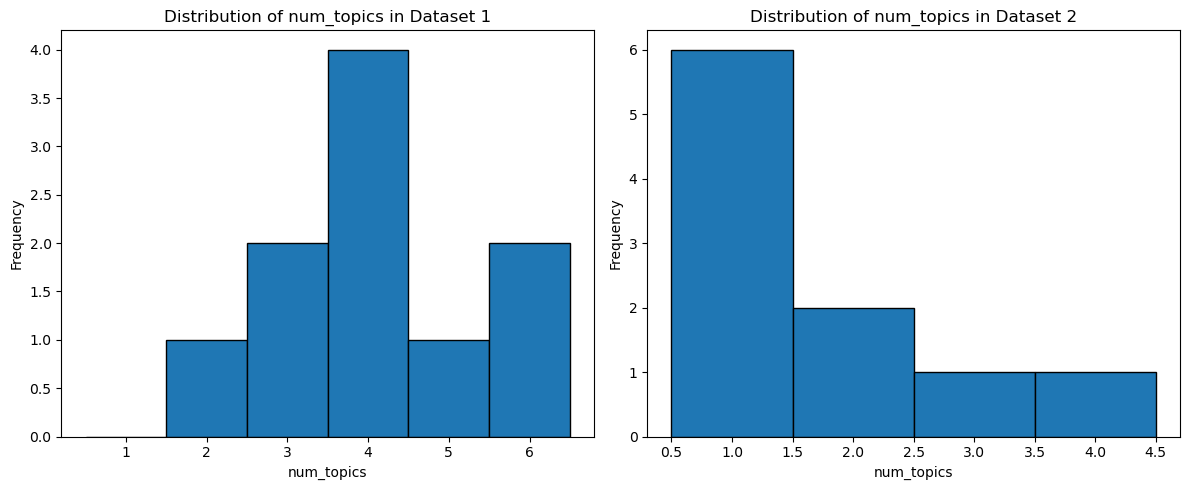

In [25]:
# Plotting the distributions
plt.figure(figsize=(12, 5))

# Dataset 1 distribution
plt.subplot(1, 2, 1)
plt.hist(df_good_topics['num_topics'], bins=np.arange(0.5, max(df_good_topics['num_topics'])+1.5, 1), edgecolor='black')
plt.title("Distribution of num_topics in Dataset 1")
plt.xlabel("num_topics")
plt.ylabel("Frequency")

# Dataset 2 distribution
plt.subplot(1, 2, 2)
plt.hist(df_bad_topics['num_topics'], bins=np.arange(0.5, max(df_bad_topics['num_topics'])+1.5, 1), edgecolor='black')
plt.title("Distribution of num_topics in Dataset 2")
plt.xlabel("num_topics")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## Given that one dataset is normally distributed (Good videogames) and the other is not (Bad videogames), the assumption of normality required for an independent samples t-test is violated. Therefore, instead of a t-test, you should use a Mann-Whitney U test to compare the num_topics between the two datasets. The Mann-Whitney U test is a non-parametric test that doesn’t assume normality.

In [27]:
from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U test
stat, p_value = mannwhitneyu(df_good_topics['num_topics'], df_bad_topics['num_topics'], alternative='two-sided')

# Display results
print("Mann-Whitney U Test")
print("Statistic:", stat)
print("p-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between the number of topics in good and bad videogames.")
else:
    print("There is no statistically significant difference between the number of topics in good and bad videogames.")


Mann-Whitney U Test
Statistic: 92.0
p-value: 0.0013025268172106592
There is a statistically significant difference between the number of topics in good and bad videogames.
